In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, accuracy_score, make_scorer, recall_score, plot_roc_curve, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

%matplotlib inline

#For Scraping
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait 
import time
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
import csv

!pip install html5lib
import html5lib

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [2]:
PATH = "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)

<ipython-input-2-7cb550b8266b>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


In [3]:
driver.get("https://www.spotrac.com/nfl/indianapolis-colts/cap/2019/")

driver.title

In [ ]:
search = driver.find_elements_by_id("main")

search.text

search.send_keys("")
search.send_keys(Keys.RETURN)


team_data_2021 = pd.read_html("https://www.spotrac.com/nfl//cap/2021/")

team_data_2021 = pd.DataFrame(team_data_2021[0])

team_data_2020 = pd.read_html("https://www.spotrac.com/nfl//cap/2020/")

team_data_2020 = pd.DataFrame(team_data_2020[0])

team_data_2019 = pd.read_html("https://www.spotrac.com/nfl//cap/2019/")

team_data_2019 = pd.DataFrame(team_data_2019[0])

team_data_2018 = pd.read_html("https://www.spotrac.com/nfl/cap/2018/")

#team_data_2018 = pd.DataFrame(team_data_2018[0])

team_data_2021['Team'] = team_data_2021['Team'].astype(str)
team_data_2021.info()

In [5]:
html_team_list = ["Jacksonville-Jaguars",
"Los-Angeles-Chargers",
"Philadelphia-Eagles",
"Denver-Broncos",
"Seattle-Seahawks",
"Pittsburgh-Steelers",
"Cleveland-Browns",
"Houston-Texans",
"Washington-Football-Team",
"Tennessee-Titans",
"New-England-Patriots",
"New-York-Jets",
"Green-Bay-Packers",
"Carolina-Panthers",
"Dallas-Cowboys",
"Indianapolis-Colts",
"Cincinnati-Bengals",
"Kansas-City-Chiefs",
"New-York-Giants",
"Los-Angeles-Rams",
"Miami-Dolphins",
"Chicago-Bears",
"Detroit-Lions",
"Tampa-Bay-Buccaneers",
"Arizona-Cardinals",
"Buffalo-Bills",
"San-Francisco-49ers",
"Las-Vegas-Raiders",
"New-Orleans-Saints",
"Baltimore-Ravens",
"Atlanta-Falcons",
"Minnesota-Vikings"
]

In [6]:
# Scraping Data by year (2021)
arz_2021 =pd.read_html("https://www.spotrac.com/nfl/Arizona-Cardinals/cap/2021")
atl_2021 =pd.read_html("https://www.spotrac.com/nfl/Atlanta-Falcons/cap/2021")
blt_2021 =pd.read_html("https://www.spotrac.com/nfl/Baltimore-Ravens/cap/2021")
buf_2021 =pd.read_html("https://www.spotrac.com/nfl/Buffalo-Bills/cap/2021")
car_2021 =pd.read_html("https://www.spotrac.com/nfl/Carolina-Panthers/cap/2021")
chi_2021 =pd.read_html("https://www.spotrac.com/nfl/Chicago-Bears/cap/2021")
cin_2021 =pd.read_html("https://www.spotrac.com/nfl/Cincinnati-Bengals/cap/2021")
cle_2021 =pd.read_html("https://www.spotrac.com/nfl/Cleveland-Browns/cap/2021")
dal_2021 =pd.read_html("https://www.spotrac.com/nfl/Dallas-Cowboys/cap/2021")
den_2021 =pd.read_html("https://www.spotrac.com/nfl/Denver-Broncos/cap/2021")
det_2021 =pd.read_html("https://www.spotrac.com/nfl/Detroit-Lions/cap/2021")
gb_2021 =pd.read_html("https://www.spotrac.com/nfl/Green-Bay-Packers/cap/2021")
hou_2021 =pd.read_html("https://www.spotrac.com/nfl/Houston-Texans/cap/2021")
ind_2021 =pd.read_html("https://www.spotrac.com/nfl/Indianapolis-Colts/cap/2021")
jax_2021 =pd.read_html("https://www.spotrac.com/nfl/Jacksonville-Jaguars/cap/2021")
kc_2021 =pd.read_html("https://www.spotrac.com/nfl/Kansas-City-Chiefs/cap/2021")
lac_2021 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Chargers/cap/2021")
lar_2021 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Rams/cap/2021")
lv_2021 =pd.read_html("https://www.spotrac.com/nfl/Las-Vegas-Raiders/cap/2021")
mia_2021 =pd.read_html("https://www.spotrac.com/nfl/Miami-Dolphins/cap/2021")
min_2021 =pd.read_html("https://www.spotrac.com/nfl/Minnesota-Vikings/cap/2021")
ne_2021 =pd.read_html("https://www.spotrac.com/nfl/New-England-Patriots/cap/2021")
no_2021 =pd.read_html("https://www.spotrac.com/nfl/New-Orleans-Saints/cap/2021")
nyg_2021 =pd.read_html("https://www.spotrac.com/nfl/New-York-Giants/cap/2021")
nyj_2021 =pd.read_html("https://www.spotrac.com/nfl/New-York-Jets/cap/2021")
phi_2021 =pd.read_html("https://www.spotrac.com/nfl/Philadelphia-Eagles/cap/2021")
pit_2021 =pd.read_html("https://www.spotrac.com/nfl/Pittsburgh-Steelers/cap/2021")
sea_2021 =pd.read_html("https://www.spotrac.com/nfl/Seattle-Seahawks/cap/2021")
sf_2021 =pd.read_html("https://www.spotrac.com/nfl/San-Francisco-49ers/cap/2021")
tb_2021 =pd.read_html("https://www.spotrac.com/nfl/Tampa-Bay-Buccaneers/cap/2021")
ten_2021 =pd.read_html("https://www.spotrac.com/nfl/Tennessee-Titans/cap/2021")
was_2021 =pd.read_html("https://www.spotrac.com/nfl/Washington-Football-Team/cap/2021")

In [7]:
# Scraping Data by year (2020)
arz_2020 =pd.read_html("https://www.spotrac.com/nfl/Arizona-Cardinals/cap/2020")
atl_2020 =pd.read_html("https://www.spotrac.com/nfl/Atlanta-Falcons/cap/2020")
blt_2020 =pd.read_html("https://www.spotrac.com/nfl/Baltimore-Ravens/cap/2020")
buf_2020 =pd.read_html("https://www.spotrac.com/nfl/Buffalo-Bills/cap/2020")
car_2020 =pd.read_html("https://www.spotrac.com/nfl/Carolina-Panthers/cap/2020")
chi_2020 =pd.read_html("https://www.spotrac.com/nfl/Chicago-Bears/cap/2020")
cin_2020 =pd.read_html("https://www.spotrac.com/nfl/Cincinnati-Bengals/cap/2020")
cle_2020 =pd.read_html("https://www.spotrac.com/nfl/Cleveland-Browns/cap/2020")
dal_2020 =pd.read_html("https://www.spotrac.com/nfl/Dallas-Cowboys/cap/2020")
den_2020 =pd.read_html("https://www.spotrac.com/nfl/Denver-Broncos/cap/2020")
det_2020 =pd.read_html("https://www.spotrac.com/nfl/Detroit-Lions/cap/2020")
gb_2020 =pd.read_html("https://www.spotrac.com/nfl/Green-Bay-Packers/cap/2020")
hou_2020 =pd.read_html("https://www.spotrac.com/nfl/Houston-Texans/cap/2020")
ind_2020 =pd.read_html("https://www.spotrac.com/nfl/Indianapolis-Colts/cap/2020")
jax_2020 =pd.read_html("https://www.spotrac.com/nfl/Jacksonville-Jaguars/cap/2020")
kc_2020 =pd.read_html("https://www.spotrac.com/nfl/Kansas-City-Chiefs/cap/2020")
lac_2020 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Chargers/cap/2020")
lar_2020 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Rams/cap/2020")
lv_2020 =pd.read_html("https://www.spotrac.com/nfl/Las-Vegas-Raiders/cap/2020")
mia_2020 =pd.read_html("https://www.spotrac.com/nfl/Miami-Dolphins/cap/2020")
min_2020 =pd.read_html("https://www.spotrac.com/nfl/Minnesota-Vikings/cap/2020")
ne_2020 =pd.read_html("https://www.spotrac.com/nfl/New-England-Patriots/cap/2020")
no_2020 =pd.read_html("https://www.spotrac.com/nfl/New-Orleans-Saints/cap/2020")
nyg_2020 =pd.read_html("https://www.spotrac.com/nfl/New-York-Giants/cap/2020")
nyj_2020 =pd.read_html("https://www.spotrac.com/nfl/New-York-Jets/cap/2020")
phi_2020 =pd.read_html("https://www.spotrac.com/nfl/Philadelphia-Eagles/cap/2020")
pit_2020 =pd.read_html("https://www.spotrac.com/nfl/Pittsburgh-Steelers/cap/2020")
sf_2020 =pd.read_html("https://www.spotrac.com/nfl/San-Francisco-49ers/cap/2020")
sea_2020 =pd.read_html("https://www.spotrac.com/nfl/Seattle-Seahawks/cap/2020")
tb_2020 =pd.read_html("https://www.spotrac.com/nfl/Tampa-Bay-Buccaneers/cap/2020")
ten_2020 =pd.read_html("https://www.spotrac.com/nfl/Tennessee-Titans/cap/2020")
was_2020 =pd.read_html("https://www.spotrac.com/nfl/Washington-Football-Team/cap/2020")

In [8]:
# 2019
arz_2019 =pd.read_html("https://www.spotrac.com/nfl/Arizona-Cardinals/cap/2019")
atl_2019 =pd.read_html("https://www.spotrac.com/nfl/Atlanta-Falcons/cap/2019")
blt_2019 =pd.read_html("https://www.spotrac.com/nfl/Baltimore-Ravens/cap/2019")
buf_2019 =pd.read_html("https://www.spotrac.com/nfl/Buffalo-Bills/cap/2019")
car_2019 =pd.read_html("https://www.spotrac.com/nfl/Carolina-Panthers/cap/2019")
chi_2019 =pd.read_html("https://www.spotrac.com/nfl/Chicago-Bears/cap/2019")
cin_2019 =pd.read_html("https://www.spotrac.com/nfl/Cincinnati-Bengals/cap/2019")
cle_2019 =pd.read_html("https://www.spotrac.com/nfl/Cleveland-Browns/cap/2019")
dal_2019 =pd.read_html("https://www.spotrac.com/nfl/Dallas-Cowboys/cap/2019")
den_2019 =pd.read_html("https://www.spotrac.com/nfl/Denver-Broncos/cap/2019")
det_2019 =pd.read_html("https://www.spotrac.com/nfl/Detroit-Lions/cap/2019")
gb_2019 =pd.read_html("https://www.spotrac.com/nfl/Green-Bay-Packers/cap/2019")
hou_2019 =pd.read_html("https://www.spotrac.com/nfl/Houston-Texans/cap/2019")
ind_2019 =pd.read_html("https://www.spotrac.com/nfl/Indianapolis-Colts/cap/2019")
jax_2019 =pd.read_html("https://www.spotrac.com/nfl/Jacksonville-Jaguars/cap/2019")
kc_2019 =pd.read_html("https://www.spotrac.com/nfl/Kansas-City-Chiefs/cap/2019")
lac_2019 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Chargers/cap/2019")
lar_2019 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Rams/cap/2019")
lv_2019 =pd.read_html("https://www.spotrac.com/nfl/Oakland-Raiders/cap/2019")
mia_2019 =pd.read_html("https://www.spotrac.com/nfl/Miami-Dolphins/cap/2019")
min_2019 =pd.read_html("https://www.spotrac.com/nfl/Minnesota-Vikings/cap/2019")
ne_2019 =pd.read_html("https://www.spotrac.com/nfl/New-England-Patriots/cap/2019")
no_2019 =pd.read_html("https://www.spotrac.com/nfl/New-Orleans-Saints/cap/2019")
nyg_2019 =pd.read_html("https://www.spotrac.com/nfl/New-York-Giants/cap/2019")
nyj_2019 =pd.read_html("https://www.spotrac.com/nfl/New-York-Jets/cap/2019")
phi_2019 =pd.read_html("https://www.spotrac.com/nfl/Philadelphia-Eagles/cap/2019")
pit_2019 =pd.read_html("https://www.spotrac.com/nfl/Pittsburgh-Steelers/cap/2019")
sf_2019 =pd.read_html("https://www.spotrac.com/nfl/San-Francisco-49ers/cap/2019")
sea_2019 =pd.read_html("https://www.spotrac.com/nfl/Seattle-Seahawks/cap/2019")
tb_2019 =pd.read_html("https://www.spotrac.com/nfl/Tampa-Bay-Buccaneers/cap/2019")
ten_2019 =pd.read_html("https://www.spotrac.com/nfl/Tennessee-Titans/cap/2019")
was_2019 =pd.read_html("https://www.spotrac.com/nfl/washington-redskins/cap/2019")

In [9]:
team_2019_list = [arz_2019,
atl_2019,
blt_2019,
buf_2019,
car_2019,
chi_2019,
cin_2019,
cle_2019,
dal_2019,
den_2019,
det_2019,
gb_2019,
hou_2019,
ind_2019,
jax_2019,
kc_2019,
lac_2019,
lar_2019,
lv_2019,
mia_2019,
min_2019,
ne_2019,
no_2019,
nyg_2019,
nyj_2019,
phi_2019,
pit_2019,
sea_2019,
sf_2019,
tb_2019,
ten_2019,
was_2019]

team_2020_list = [arz_2020,
atl_2020,
blt_2020,
buf_2020,
car_2020,
chi_2020,
cin_2020,
cle_2020,
dal_2020,
den_2020,
det_2020,
gb_2020,
hou_2020,
ind_2020,
jax_2020,
kc_2020,
lac_2020,
lar_2020,
lv_2020,
mia_2020,
min_2020,
ne_2020,
no_2020,
nyg_2020,
nyj_2020,
phi_2020,
pit_2020,
sea_2020,
sf_2020,
tb_2020,
ten_2020,
was_2020]

team_2021_list =[arz_2021,
atl_2021,
blt_2021,
buf_2021,
car_2021,
chi_2021,
cin_2021,
cle_2021,
dal_2021,
den_2021,
det_2021,
gb_2021,
hou_2021,
ind_2021,
jax_2021,
kc_2021,
lac_2021,
lar_2021,
lv_2021,
mia_2021,
min_2021,
ne_2021,
no_2021,
nyg_2021,
nyj_2021,
phi_2021,
pit_2021,
sea_2021,
sf_2021,
tb_2021,
ten_2021,
was_2021]

In [12]:
sorted_team_list = ["arz",
"atl",
"blt",
"buf",
"car",
"chi",
"cin",
"cle",
"dal",
"den",
"det",
"gb",
"hou",
"ind",
"jax",
"kc",
"lac",
"lar",
"lv",
"mia",
"min",
"ne",
"no",
"nyg",
"nyj",
"phi",
"pit",
"sea",
"sf",
"tb",
"ten",
"was"
]

In [13]:
value = -1

In [14]:
for team in team_2019_list:
    value += 1
    for i in team:
        i['year'] = '2019'
        i['team'] = sorted_team_list[value]

In [15]:
value = -1

for team in team_2020_list:
    value += 1
    for i in team:
        i['year'] = '2020'
        i['team'] = sorted_team_list[value]

In [16]:
value = -1

for team in team_2021_list:
    value += 1
    for i in team:
        i['year'] = '2021'
        i['team'] = sorted_team_list[value]

In [17]:
team_master_list = [arz_2019,
atl_2019,
blt_2019,
buf_2019,
car_2019,
chi_2019,
cin_2019,
cle_2019,
dal_2019,
den_2019,
det_2019,
gb_2019,
hou_2019,
ind_2019,
jax_2019,
kc_2019,
lac_2019,
lar_2019,
lv_2019,
mia_2019,
min_2019,
ne_2019,
no_2019,
nyg_2019,
nyj_2019,
phi_2019,
pit_2019,
sea_2019,
sf_2019,
tb_2019,
ten_2019,
was_2019,
arz_2020,
atl_2020,
blt_2020,
buf_2020,
car_2020,
chi_2020,
cin_2020,
cle_2020,
dal_2020,
den_2020,
det_2020,
gb_2020,
hou_2020,
ind_2020,
jax_2020,
kc_2020,
lac_2020,
lar_2020,
lv_2020,
mia_2020,
min_2020,
ne_2020,
no_2020,
nyg_2020,
nyj_2020,
phi_2020,
pit_2020,
sea_2020,
sf_2020,
tb_2020,
ten_2020,
was_2020,
arz_2021,
atl_2021,
blt_2021,
buf_2021,
car_2021,
chi_2021,
cin_2021,
cle_2021,
dal_2021,
den_2021,
det_2021,
gb_2021,
hou_2021,
ind_2021,
jax_2021,
kc_2021,
lac_2021,
lar_2021,
lv_2021,
mia_2021,
min_2021,
ne_2021,
no_2021,
nyg_2021,
nyj_2021,
phi_2021,
pit_2021,
sea_2021,
sf_2021,
tb_2021,
ten_2021,
was_2021
]

In [18]:
sorted_team_list = ["arz",
"atl",
"blt",
"buf",
"car",
"chi",
"cin",
"cle",
"dal",
"den",
"det",
"gb",
"hou",
"ind",
"jax",
"kc",
"lac",
"lar",
"lv",
"mia",
"min",
"ne",
"no",
"nyg",
"nyj",
"phi",
"pit",
"sea",
"sf",
"tb",
"ten",
"was"
]

In [19]:
len(sorted_team_list)

32

In [20]:
value = -1

In [21]:
for team in team_master_list:
    for i in team:
        i.iloc[:,0] = i.iloc[-1,0]
        i.rename(columns={i.columns[0]: "Status" }, inplace = True)

In [22]:
team_master_list[31]

[            Status Pos.  Base Salary Signing Bonus Roster Bonus Option Bonus  \
 0   Active Roster:   CB  $10,800,000    $3,000,000     $437,500            -   
 1   Active Roster:   RT   $4,750,000    $1,900,000     $250,000            -   
 2   Active Roster:   RB   $2,750,000    $1,000,000     $171,875            -   
 3   Active Roster:   SS     $825,000    $3,000,000            -            -   
 4   Active Roster:   QB   $3,500,000             -            -            -   
 5   Active Roster:   DT   $1,135,380    $2,141,520            -            -   
 6   Active Roster:    G   $2,000,000    $1,000,000     $250,000            -   
 7   Active Roster:    K   $2,275,000      $400,357     $500,000            -   
 8   Active Roster:   DE   $1,519,216    $1,643,432            -            -   
 9   Active Roster:   QB   $3,000,000             -      $93,750            -   
 10  Active Roster:   QB     $495,000    $2,126,202            -            -   
 11  Active Roster:   DE   $

In [23]:
team_master_list[65]

[            Status Pos.   Base Salary Signing Bonus Roster Bonus Option Bonus  \
 0   Active Roster:   QB    $2,000,000    $9,300,000            -   $2,000,000   
 1   Active Roster:   DT   $13,500,000    $4,500,000            -   $1,000,000   
 2   Active Roster:   LT    $1,075,000    $2,789,200            -   $1,800,000   
 3   Active Roster:  OLB    $6,000,000    $4,666,666            -            -   
 4   Active Roster:  ILB      $990,000    $2,200,000            -   $1,750,000   
 5   Active Roster:   TE      $660,000    $5,323,726            -            -   
 6   Active Roster:    G    $1,832,160    $2,179,319            -            -   
 7   Active Roster:   CB    $1,260,261    $1,991,045            -            -   
 8   Active Roster:   RB    $1,300,000    $1,700,000            -            -   
 9   Active Roster:   RT    $1,428,250    $1,371,498            -            -   
 10  Active Roster:   DT    $1,200,000    $1,213,333     $250,000            -   
 11  Active Rost

In [24]:
col_list = team_master_list[0][0].columns

In [25]:
fnl_df = pd.DataFrame(columns=col_list)

In [26]:
for i in team_master_list:
    for data in i:
        fnl_df = pd.concat([fnl_df, data])

In [27]:
type(fnl_df)

pandas.core.frame.DataFrame

In [28]:
fnl_df

,Status,Pos.,Base Salary,Signing Bonus,Roster Bonus,Option Bonus,Workout Bonus,Restruc. Bonus,Misc.,Dead Cap,Cap Hit,Cap %,Unnamed: 12,year,team,Cap Type.1,Incentives,Cap Total
0,Active Roster:,OLB,"$9,500,000","$3,000,000",-,-,-,"$2,333,333",-,"($25,500,000)","$14,833,333",7.66,NaN,2019,arz,NaN,NaN,NaN
1,Active Roster:,WR,"$11,000,000",-,-,-,-,-,"$750,000","($11,000,000)","$11,750,000",6.07,NaN,2019,arz,NaN,NaN,NaN
2,Active Roster:,RB,"$5,700,000","$3,000,000","$956,250",-,-,-,-,"($25,200,000)","$9,656,250",4.99,NaN,2019,arz,NaN,NaN,NaN
3,Active Roster:,LT,"$9,625,000",-,-,-,-,-,-,"($9,625,000)","$9,625,000",4.97,NaN,2019,arz,NaN,NaN,NaN
4,Active Roster:,CB,"$7,117,647",-,-,-,"$250,000","$634,588",-,"($1,519,176)","$8,002,235",4.13,NaN,2019,arz,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Cap Space,NaN,"$2,177,308","$250,000","$161,755",-,-,-,NaN,NaN,NaN,NaN,NaN,2021,was,Reserve/Non-Football Injury Money,-,"$2,589,063"
7,Cap Space,NaN,"$6,452,134","$17,056,251",-,-,-,-,NaN,NaN,NaN,NaN,NaN,2021,was,Dead Money,-,"$22,258,385"
8,Cap Space,NaN,"$846,800",-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,2021,was,Practice Squad,-,"$846,800"
9,Cap Space,NaN,"$119,033,835","$69,839,632","$5,676,034","$1,575,000","$75,000",-,NaN,NaN,NaN,NaN,NaN,2021,was,Total,"$1,200,000","$193,566,718"


In [29]:
fnl_df

,Status,Pos.,Base Salary,Signing Bonus,Roster Bonus,Option Bonus,Workout Bonus,Restruc. Bonus,Misc.,Dead Cap,Cap Hit,Cap %,Unnamed: 12,year,team,Cap Type.1,Incentives,Cap Total
0,Active Roster:,OLB,"$9,500,000","$3,000,000",-,-,-,"$2,333,333",-,"($25,500,000)","$14,833,333",7.66,NaN,2019,arz,NaN,NaN,NaN
1,Active Roster:,WR,"$11,000,000",-,-,-,-,-,"$750,000","($11,000,000)","$11,750,000",6.07,NaN,2019,arz,NaN,NaN,NaN
2,Active Roster:,RB,"$5,700,000","$3,000,000","$956,250",-,-,-,-,"($25,200,000)","$9,656,250",4.99,NaN,2019,arz,NaN,NaN,NaN
3,Active Roster:,LT,"$9,625,000",-,-,-,-,-,-,"($9,625,000)","$9,625,000",4.97,NaN,2019,arz,NaN,NaN,NaN
4,Active Roster:,CB,"$7,117,647",-,-,-,"$250,000","$634,588",-,"($1,519,176)","$8,002,235",4.13,NaN,2019,arz,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Cap Space,NaN,"$2,177,308","$250,000","$161,755",-,-,-,NaN,NaN,NaN,NaN,NaN,2021,was,Reserve/Non-Football Injury Money,-,"$2,589,063"
7,Cap Space,NaN,"$6,452,134","$17,056,251",-,-,-,-,NaN,NaN,NaN,NaN,NaN,2021,was,Dead Money,-,"$22,258,385"
8,Cap Space,NaN,"$846,800",-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,2021,was,Practice Squad,-,"$846,800"
9,Cap Space,NaN,"$119,033,835","$69,839,632","$5,676,034","$1,575,000","$75,000",-,NaN,NaN,NaN,NaN,NaN,2021,was,Total,"$1,200,000","$193,566,718"


In [30]:
filtered_df = fnl_df[['Status', 'Pos.', 'Cap Hit', 'Cap %', 'year', 'team']]

In [31]:
#now that i've filtered to only values I want, I can safely drop values
filtered_df.dropna(inplace=True)
filtered_df

<ipython-input-31-2fad198ad6e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(inplace=True)


,Status,Pos.,Cap Hit,Cap %,year,team
0,Active Roster:,OLB,"$14,833,333",7.66,2019,arz
1,Active Roster:,WR,"$11,750,000",6.07,2019,arz
2,Active Roster:,RB,"$9,656,250",4.99,2019,arz
3,Active Roster:,LT,"$9,625,000",4.97,2019,arz
4,Active Roster:,CB,"$8,002,235",4.13,2019,arz
...,...,...,...,...,...,...
54,Dead:,LB,"$9,200",0.00,2021,was
55,Dead:,QB,"$9,200",0.00,2021,was
56,Dead:,QB,"$6,667",0.00,2021,was
57,Dead:,WR,"$5,000",0.00,2021,was


In [32]:
filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace(' ', '')
filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace('$', '')
filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace(',', '')

<ipython-input-32-cf0a91c4aaf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace(' ', '')
<ipython-input-32-cf0a91c4aaf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace('$', '')
<ipython-input-32-cf0a91c4aaf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [33]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12578 entries, 0 to 58
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Status   12578 non-null  object
 1   Pos.     12578 non-null  object
 2   Cap Hit  12578 non-null  object
 3   Cap %    12578 non-null  object
 4   year     12578 non-null  object
 5   team     12578 non-null  object
dtypes: object(6)
memory usage: 687.9+ KB


In [34]:
filtered_df['ID'] = filtered_df['team'].astype(str) + '_' + filtered_df['year'].astype(str)

<ipython-input-34-2beff2ec7e72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ID'] = filtered_df['team'].astype(str) + '_' + filtered_df['year'].astype(str)


filtered_df.to_csv('filtered_df.csv')

In [36]:
#Some 0's represented as '-'
filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace('-', '0')

<ipython-input-36-6fefd1587ff2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace('-', '0')


In [37]:
filtered_df['Cap Hit'] = filtered_df['Cap Hit'].astype(int)

<ipython-input-37-fb86c1b56d37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap Hit'] = filtered_df['Cap Hit'].astype(int)


In [38]:
filtered_df['Cap Hit'] = filtered_df['Cap Hit'].astype(int)
filtered_df['Cap %'] = filtered_df['Cap %'].astype(float)

<ipython-input-38-e6c95024e434>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap Hit'] = filtered_df['Cap Hit'].astype(int)
<ipython-input-38-e6c95024e434>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap %'] = filtered_df['Cap %'].astype(float)


In [39]:
filtered_df['ID']

0     arz_2019
1     arz_2019
2     arz_2019
3     arz_2019
4     arz_2019
        ...   
54    was_2021
55    was_2021
56    was_2021
57    was_2021
58    was_2021
Name: ID, Length: 12578, dtype: object

In [40]:
filtered_df

,Status,Pos.,Cap Hit,Cap %,year,team,ID
0,Active Roster:,OLB,14833333,7.66,2019,arz,arz_2019
1,Active Roster:,WR,11750000,6.07,2019,arz,arz_2019
2,Active Roster:,RB,9656250,4.99,2019,arz,arz_2019
3,Active Roster:,LT,9625000,4.97,2019,arz,arz_2019
4,Active Roster:,CB,8002235,4.13,2019,arz,arz_2019
...,...,...,...,...,...,...,...
54,Dead:,LB,9200,0.00,2021,was,was_2021
55,Dead:,QB,9200,0.00,2021,was,was_2021
56,Dead:,QB,6667,0.00,2021,was,was_2021
57,Dead:,WR,5000,0.00,2021,was,was_2021


In [41]:
# becasue all the pages end with totals that dont line up in data frame
# ind_2019 = ind_2019[:-1]

#realized I only want lines that have cap hits
cap_hit_removal_list = ['', 'CAP HIT', '-']

# Use '~' to make "isin" = "notin"
salaries = salaries[(~salaries['CAP HIT'].isin(cap_hit_removal_list))]

#realized I only want lines that have cap hits
player_removal_list = ['Active Roster:', 'Injured Reserve:', 'NFI:',
                       'Dead:', 'Practice Squad:' ]

# Use '~' to make "isin" = "notin"
salaries = salaries[(~salaries['PLAYER'].isin(player_removal_list))]

In [42]:
win_percent_by_year = pd.read_csv('data/win_percent_by_year.csv')

In [43]:
win_percent_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            352 non-null    int64  
 1   team            352 non-null    object 
 2   win%            128 non-null    float64
 3   signed          352 non-null    int64  
 4   avg_age         352 non-null    float64
 5   active          352 non-null    object 
 6   dead            352 non-null    object 
 7   total_cap       352 non-null    object 
 8   cap_space(all)  352 non-null    object 
 9   year            352 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 27.6+ KB


In [44]:
win_percent_by_year

,rank,team,win%,signed,avg_age,active,dead,total_cap,cap_space(all),year
0,1,Jacksonville Jaguars,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0
1,2,Los Angeles Chargers,0.529,52,26.50,"$144,105,845","$6,073,247","$167,237,647","$24,492,880",2021.0
2,3,Philadelphia Eagles,0.529,62,25.32,"$101,610,988","$63,769,525","$189,181,452","$17,817,323",2021.0
3,4,Denver Broncos,0.412,55,25.78,"$107,269,390","$37,144,693","$188,343,846","$12,465,470",2021.0
4,5,Seattle Seahawks,0.412,57,26.35,"$137,955,994","$13,921,645","$172,703,125","$11,228,110",2021.0
...,...,...,...,...,...,...,...,...,...,...
347,28,San Diego Chargers,NaN,58,26.75,"$110,231,108","$2,175,001","$121,552,775","($1,177,775)",2011.0
348,29,Detroit Lions,NaN,61,26.95,"$122,665,700","$1,088,426","$124,329,126","($2,654,126)",2011.0
349,30,Miami Dolphins,NaN,62,26.29,"$113,956,396","$18,376,477","$132,332,873","($3,057,873)",2011.0
350,31,Pittsburgh Steelers,NaN,69,26.44,"$112,245,403","$2,930,762","$124,320,023","($3,439,023)",2011.0


In [45]:
#Win % data only goes as far back as 2018, may need new source or to manually add

#Checking team values
win_percent_by_year['team'].value_counts()

Tampa Bay Buccaneers        11
Buffalo Bills               11
Detroit Lions               11
Atlanta Falcons             11
Cleveland Browns            11
Philadelphia Eagles         11
Dallas Cowboys              11
Minnesota Vikings           11
Denver Broncos              11
Seattle Seahawks            11
New York Jets               11
Indianapolis Colts          11
Baltimore Ravens            11
New York Giants             11
Kansas City Chiefs          11
Green Bay Packers           11
Carolina Panthers           11
Tennessee Titans            11
Cincinnati Bengals          11
Jacksonville Jaguars        11
Houston Texans              11
Miami Dolphins              11
Pittsburgh Steelers         11
Chicago Bears               11
San Francisco 49ers         11
New Orleans Saints          11
Arizona Cardinals           11
New England Patriots        11
Washington Redskins          9
Oakland Raiders              9
San Diego Chargers           6
Los Angeles Rams             6
St. Loui

In [46]:
# Looks like every team is there for 11 seasons which is true, bue a few teams have switched cities resulting in multiple names
# I will convert them to their modern abreviations tp avoid confusion

win_percent_by_year['team'] = win_percent_by_year['team'].replace({'Minnesota Vikings': 'min',
                                                                       'Pittsburgh Steelers': 'pit',
                                                                       'Cleveland Browns': 'cle',
                                                                      'Seattle Seahawks': 'sea',
                                                                      'Baltimore Ravens': 'blt',
                                                                      'New York Jets': 'nyj',
                                                                      'Atlanta Falcons': 'atl',
                                                                      'Carolina Panthers': 'car',
                                                                      'Kansas City Chiefs': 'kc',
                                                                      'Buffalo Bills': 'buf',
                                                                      'Denver Broncos': 'den',
                                                                      'Indianapolis Colts': 'ind',
                                                                      'Tennessee Titans': 'ten',
                                                                      'Tampa Bay Buccaneers': 'tb',
                                                                      'Dallas Cowboys': 'dal',
                                                                      'Miami Dolphins': 'mia',
                                                                      'New York Giants': 'nyg',
                                                                      'New England Patriots': 'ne',
                                                                      'Green Bay Packers': 'gb',
                                                                      'Jacksonville Jaguars': 'jax',
                                                                      'Chicago Bears': 'chi',
                                                                      'Houston Texans': 'hou',
                                                                      'Detroit Lions': 'det',
                                                                      'New Orleans Saints': 'no',
                                                                      'San Francisco 49ers': 'sf',
                                                                      'Philadelphia Eagles': 'phi',
                                                                      'Arizona Cardinals': 'arz',
                                                                      'Cincinnati Bengals': 'cin',
                                                                      'Washington Redskins': 'was',
                                                                      'Washington Football Team': 'was',
                                                                      'Oakland Raiders': 'lv',
                                                                      'Las Vegas Raiders': 'lv',
                                                                      'Los Angeles Rams': 'lar',
                                                                      'St. Louis Rams': 'lar',
                                                                      'San Diego Chargers': 'lac',
                                                                      'Los Angeles Chargers': 'lac'})

In [47]:
#Verify
win_percent_by_year['team'].value_counts()

atl    11
cle    11
lv     11
sea    11
min    11
jax    11
nyg    11
blt    11
no     11
det    11
hou    11
dal    11
buf    11
sf     11
chi    11
tb     11
gb     11
phi    11
arz    11
ne     11
ind    11
ten    11
nyj    11
cin    11
den    11
mia    11
car    11
was    11
lac    11
lar    11
pit    11
kc     11
Name: team, dtype: int64

In [48]:
winpercentage_21 = win_percent_by_year[(win_percent_by_year['year'] == 2021)]

In [49]:
winpercentage_20 = win_percent_by_year[(win_percent_by_year['year'] == 2020)]


In [50]:
winpercentage_19 = win_percent_by_year[(win_percent_by_year['year'] == 2019)]


In [51]:
winpercentage_21

,rank,team,win%,signed,avg_age,active,dead,total_cap,cap_space(all),year
0,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0
1,2,lac,0.529,52,26.50,"$144,105,845","$6,073,247","$167,237,647","$24,492,880",2021.0
2,3,phi,0.529,62,25.32,"$101,610,988","$63,769,525","$189,181,452","$17,817,323",2021.0
3,4,den,0.412,55,25.78,"$107,269,390","$37,144,693","$188,343,846","$12,465,470",2021.0
4,5,sea,0.412,57,26.35,"$137,955,994","$13,921,645","$172,703,125","$11,228,110",2021.0
5,6,pit,0.559,54,25.80,"$125,664,123","$30,380,017","$177,407,130","$10,042,925",2021.0
6,7,cle,0.471,56,25.59,"$126,473,899","$29,003,079","$202,441,273","$9,468,418",2021.0
7,8,hou,0.235,56,26.80,"$115,736,939","$48,012,147","$186,825,534","$7,643,225",2021.0
8,9,was,0.412,56,25.68,"$108,019,140","$22,258,385","$193,566,718","$6,172,203",2021.0
9,10,ten,0.706,56,27.00,"$141,092,116","$30,830,452","$184,416,734","$6,128,963",2021.0


In [52]:
winpercentage_21['ID'] = winpercentage_21['team'].astype(str) + '_' + winpercentage_21['year'].astype(int).astype(str)
winpercentage_20['ID'] = winpercentage_20['team'].astype(str) + '_' + winpercentage_20['year'].astype(int).astype(str)
winpercentage_19['ID'] = winpercentage_19['team'].astype(str) + '_' + winpercentage_19['year'].astype(int).astype(str)

<ipython-input-52-fb33366343e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winpercentage_21['ID'] = winpercentage_21['team'].astype(str) + '_' + winpercentage_21['year'].astype(int).astype(str)
<ipython-input-52-fb33366343e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winpercentage_20['ID'] = winpercentage_20['team'].astype(str) + '_' + winpercentage_20['year'].astype(int).astype(str)
<ipython-input-52-fb33366343e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [53]:
winpercentage_21

,rank,team,win%,signed,avg_age,active,dead,total_cap,cap_space(all),year,ID
0,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0,jax_2021
1,2,lac,0.529,52,26.50,"$144,105,845","$6,073,247","$167,237,647","$24,492,880",2021.0,lac_2021
2,3,phi,0.529,62,25.32,"$101,610,988","$63,769,525","$189,181,452","$17,817,323",2021.0,phi_2021
3,4,den,0.412,55,25.78,"$107,269,390","$37,144,693","$188,343,846","$12,465,470",2021.0,den_2021
4,5,sea,0.412,57,26.35,"$137,955,994","$13,921,645","$172,703,125","$11,228,110",2021.0,sea_2021
5,6,pit,0.559,54,25.80,"$125,664,123","$30,380,017","$177,407,130","$10,042,925",2021.0,pit_2021
6,7,cle,0.471,56,25.59,"$126,473,899","$29,003,079","$202,441,273","$9,468,418",2021.0,cle_2021
7,8,hou,0.235,56,26.80,"$115,736,939","$48,012,147","$186,825,534","$7,643,225",2021.0,hou_2021
8,9,was,0.412,56,25.68,"$108,019,140","$22,258,385","$193,566,718","$6,172,203",2021.0,was_2021
9,10,ten,0.706,56,27.00,"$141,092,116","$30,830,452","$184,416,734","$6,128,963",2021.0,ten_2021


In [54]:
win_percent_list =[winpercentage_21, winpercentage_20, winpercentage_19]

win_percent_df = pd.DataFrame(columns=winpercentage_21.columns)

In [55]:
for i in win_percent_list:
    win_percent_df = pd.concat([win_percent_df, i])

In [56]:
win_percent_df

,rank,team,win%,signed,avg_age,active,dead,total_cap,cap_space(all),year,ID
0,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0,jax_2021
1,2,lac,0.529,52,26.50,"$144,105,845","$6,073,247","$167,237,647","$24,492,880",2021.0,lac_2021
2,3,phi,0.529,62,25.32,"$101,610,988","$63,769,525","$189,181,452","$17,817,323",2021.0,phi_2021
3,4,den,0.412,55,25.78,"$107,269,390","$37,144,693","$188,343,846","$12,465,470",2021.0,den_2021
4,5,sea,0.412,57,26.35,"$137,955,994","$13,921,645","$172,703,125","$11,228,110",2021.0,sea_2021
...,...,...,...,...,...,...,...,...,...,...,...
91,28,arz,0.344,53,25.83,"$118,348,287","$50,898,166","$192,019,927","$1,585,204",2019.0,arz_2019
92,29,nyg,0.250,53,25.66,"$125,098,384","$55,156,416","$194,612,924","$1,492,067",2019.0,nyg_2019
93,30,min,0.625,51,26.10,"$177,166,406","$8,379,795","$191,016,955","$805,215",2019.0,min_2019
94,31,pit,0.500,53,25.68,"$129,754,417","$34,440,395","$206,404,929","$493,991",2019.0,pit_2019


In [57]:
merged_df = pd.merge(win_percent_df, filtered_df, on = 'ID', how= 'outer')

In [58]:
merged_df

,rank,team_x,win%,signed,avg_age,active,dead,total_cap,cap_space(all),year_x,ID,Status,Pos.,Cap Hit,Cap %,year_y,team_y
0,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0,jax_2021,Active Roster:,G,15000000,7.18,2021,jax
1,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0,jax_2021,Active Roster:,LT,13754000,6.58,2021,jax
2,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0,jax_2021,Active Roster:,ILB,12150000,5.81,2021,jax
3,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0,jax_2021,Active Roster:,C,8529412,4.08,2021,jax
4,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0,jax_2021,Active Roster:,QB,6689725,3.20,2021,jax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,32,blt,0.875,53,26.83,"$139,521,776","$30,289,731","$190,028,527","($2,323,572)",2019.0,blt_2019,Dead:,WR,2000,0.00,2019,blt
12574,32,blt,0.875,53,26.83,"$139,521,776","$30,289,731","$190,028,527","($2,323,572)",2019.0,blt_2019,Dead:,ILB,1666,0.00,2019,blt
12575,32,blt,0.875,53,26.83,"$139,521,776","$30,289,731","$190,028,527","($2,323,572)",2019.0,blt_2019,Dead:,K,1333,0.00,2019,blt
12576,32,blt,0.875,53,26.83,"$139,521,776","$30,289,731","$190,028,527","($2,323,572)",2019.0,blt_2019,Dead:,ILB,668,0.00,2019,blt


In [134]:
FINAL_df = merged_df[['Status', 'Pos.', 'Cap Hit', 'Cap %', 'ID', 'win%', 'signed', 'avg_age',"team_x",'year_y']]

In [135]:
FINAL_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12578 entries, 0 to 12577
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Status   12578 non-null  object 
 1   Pos.     12578 non-null  object 
 2   Cap Hit  12578 non-null  int32  
 3   Cap %    12578 non-null  float64
 4   ID       12578 non-null  object 
 5   win%     12578 non-null  float64
 6   signed   12578 non-null  object 
 7   avg_age  12578 non-null  float64
 8   team_x   12578 non-null  object 
 9   year_y   12578 non-null  object 
dtypes: float64(3), int32(1), object(6)
memory usage: 1.0+ MB


In [136]:
# Bin Pos. values in smaller position groups.
FINAL_df['Pos.'].value_counts()

WR     1654
CB     1437
DE      957
DT      933
RB      898
TE      831
G       761
OLB     645
QB      541
S       528
ILB     470
T       452
LB      437
C       394
K       264
FS      244
RT      242
LT      208
SS      205
P       191
LS      158
FB      124
OL        4
Name: Pos., dtype: int64

In [137]:
# I will break down these 23 position groups in the following 8 categories for analysis

# Create list to be merged with dataframe
pos_grp_list = []

#convert both title columns to lists for conversion later.
pos_list = FINAL_df['Pos.'].tolist()

# Create duplicate title list.
for pos in pos_list:
     if pos == 'WR':
        pos_grp_list.append('receiver')
     elif pos == 'CB':
        pos_grp_list.append('d-back')
     elif pos == 'DT':
        pos_grp_list.append('d-line')
     elif pos == 'DE':
        pos_grp_list.append('d-line')
     elif pos == 'RB':
        pos_grp_list.append('runner')
     elif pos == 'TE':
        pos_grp_list.append('receiver')
     elif pos == 'G':
        pos_grp_list.append('o-line')
     elif pos == 'S':
        pos_grp_list.append('d-back')
     elif pos == 'QB':
        pos_grp_list.append('passer')
     elif pos == 'OLB':
        pos_grp_list.append('linebacker')
     elif pos == 'LB':
        pos_grp_list.append('linebacker')
     elif pos == 'T':
        pos_grp_list.append('o-line')
     elif pos == 'ILB':
        pos_grp_list.append('linebacker')
     elif pos == 'C':
        pos_grp_list.append('o-line')
     elif pos == 'K':
        pos_grp_list.append('kicking')
     elif pos == 'RT':
        pos_grp_list.append('o-line')
     elif pos == 'LT':
        pos_grp_list.append('o-line')
     elif pos == 'P':
        pos_grp_list.append('kicking')
     elif pos == 'FS':
        pos_grp_list.append('d-back')
     elif pos == 'SS':
        pos_grp_list.append('d-back') 
     elif pos == 'LS':
        pos_grp_list.append('kicking')
     elif pos == 'FB':
        pos_grp_list.append('runner')
     elif pos == 'OL':
        pos_grp_list.append('o-line')
     else:
         continue

# make sure list is 12578
len(pos_grp_list)

12578

In [138]:
FINAL_df['POS_GRP'] = pos_grp_list

<ipython-input-138-91ddf4b9e84e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FINAL_df['POS_GRP'] = pos_grp_list


In [139]:
FINAL_df.describe()

,Cap Hit,Cap %,win%,avg_age
count,1.257800e+04,12578.000000,12578.000000,12578.000000
mean,1.465177e+06,0.727772,0.493051,26.183677
std,3.040663e+06,1.510517,0.192210,0.578946
min,0.000000e+00,0.000000,0.063000,24.980000
25%,6.705800e+04,0.030000,0.353000,25.770000
50%,4.166670e+05,0.210000,0.500000,26.100000
75%,1.093754e+06,0.560000,0.647000,26.660000
max,3.382061e+07,17.400000,0.875000,27.580000


In [140]:
# Binning win% based on metrics above.
# low_win% = 0.00 - 0.353
# avg_win% = .354 - .647
# high_win% = .648 - 1.00

# Create list to be merged with dataframe
win_bin_list = []

#convert both title columns to lists for conversion later.
win_list = FINAL_df['win%'].tolist()

# Create duplicate title list.
for percent in win_list:
     if percent <= .353:
        win_bin_list.append('low_win%')
     elif percent <= .647:
        win_bin_list.append('avg_win%')
     elif percent <= 1:
        win_bin_list.append('high_win%')
     else:
         continue

# make sure list is 12578
len(win_bin_list)


12578

In [141]:
FINAL_df['WIN%_GRP'] = win_bin_list

<ipython-input-141-af4cd507d720>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FINAL_df['WIN%_GRP'] = win_bin_list


<function matplotlib.pyplot.show(close=None, block=None)>

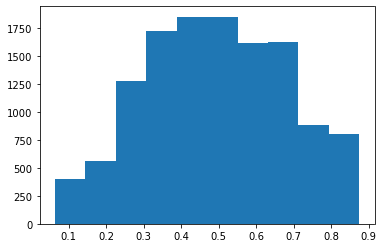

In [142]:
fig,ax = plt.subplots()
ax.hist(FINAL_df['win%'])
plt.show

In [143]:
FINAL_df = FINAL_df.drop(['Cap Hit', 'Pos.'], axis=1)

In [271]:
ID_df = FINAL_df.groupby(['ID','Pos.'][]).count()

ValueError: Grouper and axis must be same length

In [268]:
ID_df

,Status,Cap %,win%,signed,avg_age,team_x,year_y,POS_GRP,WIN%_GRP,ID2
ID,,,,,,,,,,
arz_2019,133,133,133,133,133,133,133,133,133,133
arz_2020,140,140,140,140,140,140,140,140,140,140
arz_2021,150,150,150,150,150,150,150,150,150,150
atl_2019,122,122,122,122,122,122,122,122,122,122
atl_2020,120,120,120,120,120,120,120,120,120,120
...,...,...,...,...,...,...,...,...,...,...
ten_2020,139,139,139,139,139,139,139,139,139,139
ten_2021,165,165,165,165,165,165,165,165,165,165
was_2019,129,129,129,129,129,129,129,129,129,129


In [146]:
type(ID_df)

pandas.core.frame.DataFrame

In [147]:
FINAL_df

,Status,Cap %,ID,win%,signed,avg_age,team_x,year_y,POS_GRP,WIN%_GRP
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%
2,Active Roster:,5.81,jax_2021,0.176,58,25.48,jax,2021,linebacker,low_win%
3,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%
4,Active Roster:,3.20,jax_2021,0.176,58,25.48,jax,2021,passer,low_win%
...,...,...,...,...,...,...,...,...,...,...
12573,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,receiver,high_win%
12574,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%
12575,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,kicking,high_win%
12576,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%


In [148]:
FINAL_df['ID2'] = FINAL_df['ID'].astype(str) + '_' + FINAL_df['POS_GRP'].astype(str)

In [149]:
FINAL_df

,Status,Cap %,ID,win%,signed,avg_age,team_x,year_y,POS_GRP,WIN%_GRP,ID2
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line
2,Active Roster:,5.81,jax_2021,0.176,58,25.48,jax,2021,linebacker,low_win%,jax_2021_linebacker
3,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line
4,Active Roster:,3.20,jax_2021,0.176,58,25.48,jax,2021,passer,low_win%,jax_2021_passer
...,...,...,...,...,...,...,...,...,...,...,...
12573,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,receiver,high_win%,blt_2019_receiver
12574,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker
12575,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,kicking,high_win%,blt_2019_kicking
12576,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker


In [150]:
new_df = FINAL_df.groupby(['ID']).sum()

In [151]:
new_df

,Cap %,win%,avg_age
ID,,,
arz_2019,99.19,45.752,3435.39
arz_2020,98.74,70.000,3738.00
arz_2021,99.43,97.050,4093.50
atl_2019,97.10,53.436,3248.86
atl_2020,98.66,30.000,3208.80
...,...,...,...
ten_2020,98.26,95.632,3727.98
ten_2021,96.69,116.490,4455.00
was_2019,93.34,24.252,3356.58


In [152]:
new_merged_df = pd.merge(FINAL_df, new_df, on = 'ID', how= 'outer')

In [153]:
new_merged_df

,Status,Cap %_x,ID,win%_x,signed,avg_age_x,team_x,year_y,POS_GRP,WIN%_GRP,ID2,Cap %_y,win%_y,avg_age_y
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96
2,Active Roster:,5.81,jax_2021,0.176,58,25.48,jax,2021,linebacker,low_win%,jax_2021_linebacker,86.39,26.752,3872.96
3,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96
4,Active Roster:,3.20,jax_2021,0.176,58,25.48,jax,2021,passer,low_win%,jax_2021_passer,86.39,26.752,3872.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,receiver,high_win%,blt_2019_receiver,101.22,101.500,3112.28
12574,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker,101.22,101.500,3112.28
12575,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,kicking,high_win%,blt_2019_kicking,101.22,101.500,3112.28
12576,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker,101.22,101.500,3112.28


In [154]:
new_df_2 = FINAL_df.groupby(['ID2']).sum()

In [155]:
new_df_2

,Cap %,win%,avg_age
ID2,,,
arz_2019_d-back,15.84,8.600,645.75
arz_2019_d-line,8.05,6.536,490.77
arz_2019_kicking,1.93,1.376,103.32
arz_2019_linebacker,18.24,7.224,542.43
arz_2019_o-line,20.56,7.912,594.09
...,...,...,...
was_2021_linebacker,5.70,7.416,462.24
was_2021_o-line,23.25,11.536,719.04
was_2021_passer,12.94,3.708,231.12


In [156]:
new_merged_df_2 = pd.merge(new_merged_df, new_df_2, on = 'ID2', how= 'outer')

In [157]:
new_merged_df_2

,Status,Cap %_x,ID,win%_x,signed,avg_age_x,team_x,year_y,POS_GRP,WIN%_GRP,ID2,Cap %_y,win%_y,avg_age_y,Cap %,win%,avg_age
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96,24.75,3.696,535.08
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96,24.75,3.696,535.08
2,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96,24.75,3.696,535.08
3,Active Roster:,1.02,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96,24.75,3.696,535.08
4,Active Roster:,0.66,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96,24.75,3.696,535.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker,101.22,101.500,3112.28,5.98,17.500,536.60
12574,Active Roster:,1.15,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,101.22,101.500,3112.28,10.76,3.500,107.32
12575,Active Roster:,0.80,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,101.22,101.500,3112.28,10.76,3.500,107.32
12576,Active Roster:,0.29,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,101.22,101.500,3112.28,10.76,3.500,107.32


In [158]:
new_merged_df_2 = new_merged_df_2.rename(columns={"Cap %_x": "cap_player", "win%_x": "win_player",
                                "avg_age_x": "avg_age_player", "Cap %_y": "total_team_cap",
                                "win%": "win%_ID2", "Cap %": "cap_ID2",
                                })

In [159]:
new_merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12578 entries, 0 to 12577
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Status          12578 non-null  object 
 1   cap_player      12578 non-null  float64
 2   ID              12578 non-null  object 
 3   win_player      12578 non-null  float64
 4   signed          12578 non-null  object 
 5   avg_age_player  12578 non-null  float64
 6   team_x          12578 non-null  object 
 7   year_y          12578 non-null  object 
 8   POS_GRP         12578 non-null  object 
 9   WIN%_GRP        12578 non-null  object 
 10  ID2             12578 non-null  object 
 11  total_team_cap  12578 non-null  float64
 12  win%_y          12578 non-null  float64
 13  avg_age_y       12578 non-null  float64
 14  cap_ID2         12578 non-null  float64
 15  win%_ID2        12578 non-null  float64
 16  avg_age         12578 non-null  float64
dtypes: float64(9), object(8)
memory

In [160]:
new_merged_df_2

,Status,cap_player,ID,win_player,signed,avg_age_player,team_x,year_y,POS_GRP,WIN%_GRP,ID2,total_team_cap,win%_y,avg_age_y,cap_ID2,win%_ID2,avg_age
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96,24.75,3.696,535.08
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96,24.75,3.696,535.08
2,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96,24.75,3.696,535.08
3,Active Roster:,1.02,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96,24.75,3.696,535.08
4,Active Roster:,0.66,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96,24.75,3.696,535.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker,101.22,101.500,3112.28,5.98,17.500,536.60
12574,Active Roster:,1.15,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,101.22,101.500,3112.28,10.76,3.500,107.32
12575,Active Roster:,0.80,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,101.22,101.500,3112.28,10.76,3.500,107.32
12576,Active Roster:,0.29,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,101.22,101.500,3112.28,10.76,3.500,107.32


In [161]:
new_merged_df_2.describe()

,cap_player,win_player,avg_age_player,total_team_cap,win%_y,avg_age_y,cap_ID2,win%_ID2,avg_age
count,12578.000000,12578.000000,12578.000000,12578.000000,12578.000000,12578.000000,12578.000000,12578.000000,12578.000000
mean,0.727772,0.493051,26.183677,95.412689,64.627018,3479.899447,14.043398,9.981590,538.149630
std,1.510517,0.192210,0.578946,4.189741,24.545708,415.772612,6.183387,5.166196,192.723434
min,0.000000,0.063000,24.980000,82.430000,9.765000,2433.900000,0.780000,0.315000,76.590000
25%,0.030000,0.353000,25.770000,93.340000,46.866000,3184.320000,10.100000,6.000000,429.250000
50%,0.210000,0.500000,26.100000,96.940000,63.480000,3482.700000,14.550000,9.420000,551.250000
75%,0.560000,0.647000,26.660000,98.390000,83.125000,3780.920000,18.187500,13.500000,672.750000
max,17.400000,0.875000,27.580000,101.220000,116.490000,4455.000000,35.970000,24.004000,1009.730000


In [162]:
new_merged_df_2['ID3'] = new_merged_df_2['year_y'].astype(str) + '_' + new_merged_df_2['POS_GRP'].astype(str)

In [178]:
new_merged_df_2

,Status,cap_player,ID,win_player,signed,avg_age_player,team_x,year_y,POS_GRP,WIN%_GRP,ID2,total_team_cap,win%_y,avg_age_y,cap_ID2,win%_ID2,avg_age,ID3
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96,24.75,3.696,535.08,2021_o-line
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96,24.75,3.696,535.08,2021_o-line
2,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96,24.75,3.696,535.08,2021_o-line
3,Active Roster:,1.02,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96,24.75,3.696,535.08,2021_o-line
4,Active Roster:,0.66,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,86.39,26.752,3872.96,24.75,3.696,535.08,2021_o-line
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker,101.22,101.500,3112.28,5.98,17.500,536.60,2019_linebacker
12574,Active Roster:,1.15,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,101.22,101.500,3112.28,10.76,3.500,107.32,2019_passer
12575,Active Roster:,0.80,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,101.22,101.500,3112.28,10.76,3.500,107.32,2019_passer
12576,Active Roster:,0.29,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,101.22,101.500,3112.28,10.76,3.500,107.32,2019_passer


In [265]:
ID2_df = new_merged_df_2.groupby(['POS_GRP'])[['cap_ID2']]['Status'].sum()

IndexError: Column(s) ['cap_ID2'] already selected

In [264]:
ID2_df

,cap_ID2
POS_GRP,
d-back,40398.82
d-line,29290.83
kicking,1690.02
linebacker,19017.31
o-line,36488.20
passer,5747.04
receiver,38997.88
runner,5007.76


In [200]:
subset = new_merged_df_2[['cap_ID2', 'POS_GRP']]
tuples = [tuple(x) for x in subset.to_numpy()]
tuples

[(24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (16.540000000000003, 'linebacker'),
 (16.540000000000003, 'linebacker'),
 (16.540000000000003, 'linebacker'),
 (16.540000000000003, 'linebacker'),
 (16.540000000000003, 'linebacker'),
 (16.540000000000003, 'linebacker'),
 (16.540000000000003, 'linebacker'),
 (16.540000000000003, 'linebacker'),
 (16.540000

In [208]:
spending_list = []

# Binning POS_GRP_SPENDING based on metrics above.
# low_win% = 0.00 - 0.353
# avg_win% = .354 - .647
# high_win% = .648 - 1.00

for cap, pos_grp in tuples:
    if pos_grp == 'd-back':
        if cap <= 13.26:
            spending_list.append('low_spend')
        elif cap <= 18.98:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue
    elif pos_grp == 'd-line':
        if cap <= 11.41:
            spending_list.append('low_spend')
        elif cap <= 19.13:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue
    elif pos_grp == 'kicking':
        if cap <= 1.95:
            spending_list.append('low_spend')
        elif cap <= 3.47:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue
    elif pos_grp == 'linebacker':
        if cap <= 7.88:
            spending_list.append('low_spend')
        elif cap <= 15.675:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue
    elif pos_grp == 'o-line':
        if cap <= 15.32:
            spending_list.append('low_spend')
        elif cap <= 19.85:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue
    elif pos_grp == 'passer':
        if cap <= 6.18:
            spending_list.append('low_spend')
        elif cap <= 14.39:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue
    elif pos_grp == 'receiver':
        if cap <= 12.47:
            spending_list.append('low_spend')
        elif cap <= 18.32:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue
    else:
        if cap <= 3.34:
            spending_list.append('low_spend')
        elif cap <= 6.2:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue

In [211]:
# make sure list is 12578
print(len(spending_list) == 12578)
new_merged_df_2['pos_grp_spending'] = spending_list

True


In [212]:
new_merged_df_2

,Status,cap_player,ID,win_player,signed,avg_age_player,team_x,year_y,POS_GRP,WIN%_GRP,...,total_team_cap,win%_y,avg_age_y,cap_ID2,win%_ID2,avg_age,ID3,d_back_bin,d_line_bin,pos_grp_spending
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,...,86.39,26.752,3872.96,24.75,3.696,535.08,2021_o-line,high_spend,high_spend,high_spend
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,...,86.39,26.752,3872.96,24.75,3.696,535.08,2021_o-line,high_spend,high_spend,high_spend
2,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,...,86.39,26.752,3872.96,24.75,3.696,535.08,2021_o-line,high_spend,high_spend,high_spend
3,Active Roster:,1.02,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,...,86.39,26.752,3872.96,24.75,3.696,535.08,2021_o-line,high_spend,high_spend,high_spend
4,Active Roster:,0.66,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,...,86.39,26.752,3872.96,24.75,3.696,535.08,2021_o-line,high_spend,high_spend,high_spend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,...,101.22,101.500,3112.28,5.98,17.500,536.60,2019_linebacker,low_spend,low_spend,low_spend
12574,Active Roster:,1.15,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,...,101.22,101.500,3112.28,10.76,3.500,107.32,2019_passer,low_spend,low_spend,med_spend
12575,Active Roster:,0.80,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,...,101.22,101.500,3112.28,10.76,3.500,107.32,2019_passer,low_spend,low_spend,med_spend
12576,Active Roster:,0.29,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,...,101.22,101.500,3112.28,10.76,3.500,107.32,2019_passer,low_spend,low_spend,med_spend


In [256]:
model_df = new_merged_df_2[['Status', 'POS_GRP', 'pos_grp_spending', 'WIN%_GRP', 'avg_age_player']]

le = LabelEncoder()
#model_df['WIN%_GRP'] = le.fit_transform(model_df['WIN%_GRP'])

model_df = pd.get_dummies(model_df, columns=['Status', 'POS_GRP', 'pos_grp_spending','WIN%_GRP'])
# (sparse=false?)

# OneHotEncoder(handle_unknown='ignore')?
#model_df['WIN%_GRP'] = ohe.fit_transform(model_df[['WIN%_GRP']])

model_df

,avg_age_player,Status_Active Roster:,Status_Dead:,Status_Exempt:,Status_Injured Reserve:,Status_Left:,Status_NFI:,Status_Practice Squad:,Status_Reserve/PUP:,Status_Suspended:,...,POS_GRP_o-line,POS_GRP_passer,POS_GRP_receiver,POS_GRP_runner,pos_grp_spending_high_spend,pos_grp_spending_low_spend,pos_grp_spending_med_spend,WIN%_GRP_avg_win%,WIN%_GRP_high_win%,WIN%_GRP_low_win%
0,25.48,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,25.48,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,25.48,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,25.48,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,25.48,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,26.83,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
12574,26.83,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
12575,26.83,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
12576,26.83,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [257]:
model_df.to_csv('data/model.csv')

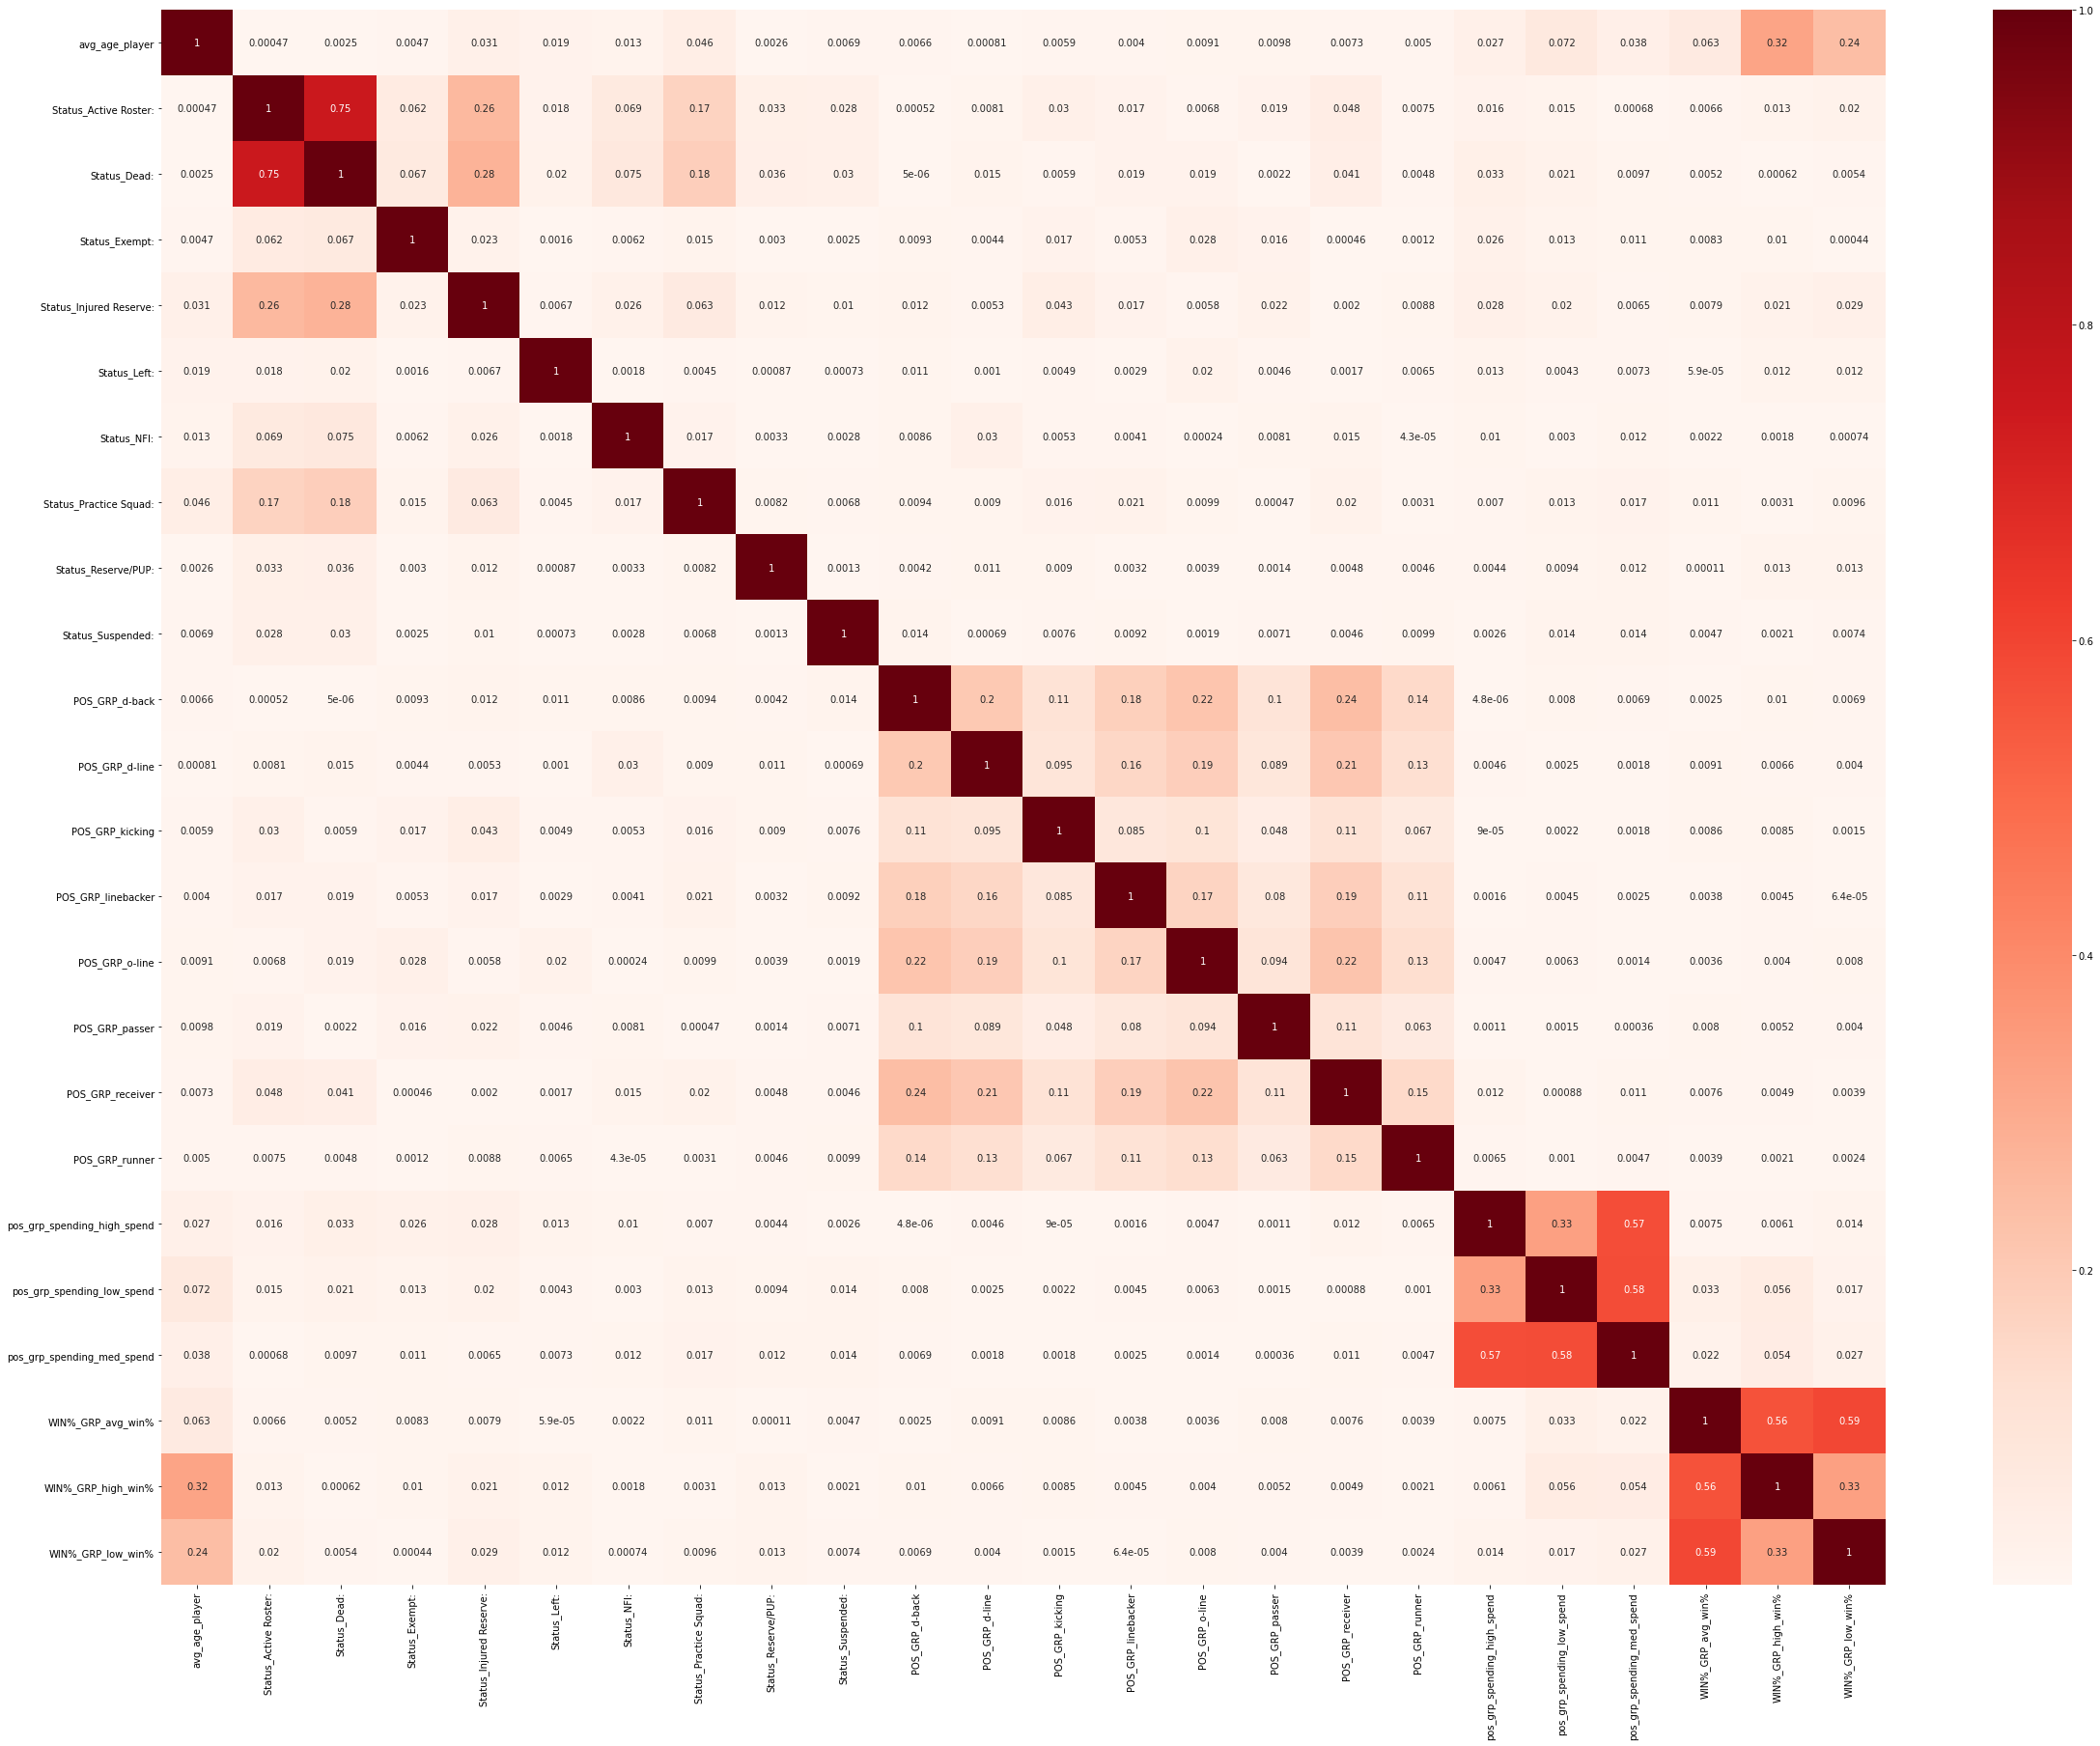

In [258]:
# Heatmap to display correlations in data
corr = model_df.corr().abs()
fig, ax=plt.subplots(figsize=(40,30))
sns.heatmap(corr, cmap='Reds', annot=True);

In [259]:
# model
x = model_df.drop(columns=['WIN%_GRP_high_win%', 'WIN%_GRP_avg_win%', 'WIN%_GRP_low_win%'], axis=1)
y = model_df['WIN%_GRP_high_win%']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)

# Scale data
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

Train 0.7561751298632461
Test 0.7650238473767885


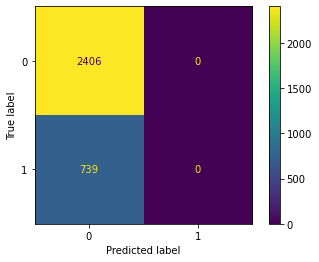

In [260]:
# Instantiated, fit, and ran dummy model
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(x_train_scaled, y_train)
y_hat_train = dummy_model.predict(x_train_scaled)
y_hat_test = dummy_model.predict(x_test_scaled)
print(f'Train {accuracy_score(y_train, y_hat_train)}')
print(f'Test {accuracy_score(y_test, y_hat_test)}')

# Plotted confusion matrix and ROC AUC for dummy model
plot_confusion_matrix(dummy_model, x_test_scaled, y_test)

Train 0.8225378988656843
Test 0.8308426073131956


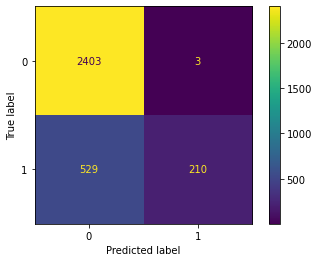

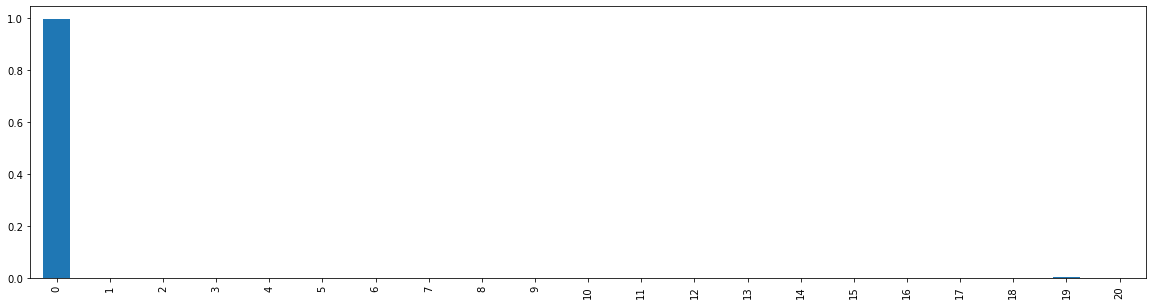

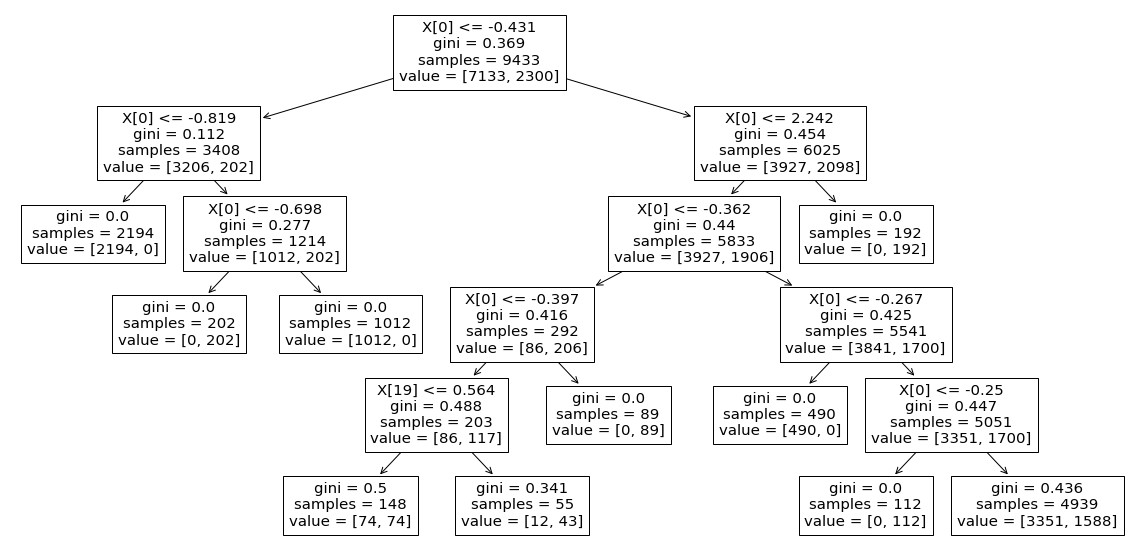

In [261]:
# Instantiated, fit, and ran basic decision tree model
clf = DecisionTreeClassifier(max_depth = 5) 
clf.fit(x_train_scaled, y_train)
y_hat_train = clf.predict(x_train_scaled)
y_hat_test = clf.predict(x_test_scaled)
print(f'Train {accuracy_score(y_train, y_hat_train)}')
print(f'Test {accuracy_score(y_test, y_hat_test)}')

# Plotted confusion matrix and ROC AUC for basic decision tree model
plot_confusion_matrix(clf, x_test_scaled, y_test);

# Plotted feature importance for basic decision tree model
ranking = clf.feature_importances_
fig, ax = plt.subplots(figsize=(20,5))
pd.Series(ranking).plot.bar(ax=ax);

# Plotted basic decision tree model
f, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf);

Train 0.7591434326301283
Test 0.7659777424483307


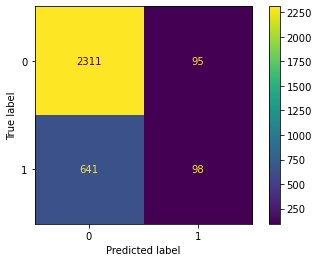

In [262]:
lr = LogisticRegression(random_state=15)
lr.fit(x_train_scaled, y_train)
y_hat_train = lr.predict(x_train_scaled) 
y_hat_test = lr.predict(x_test_scaled) 
print(f'Train {accuracy_score(y_train, y_hat_train)}')
print(f'Test {accuracy_score(y_test, y_hat_test)}')

# Plotted confusion matrix and ROC AUC for dummy model
plot_confusion_matrix(lr, x_test_scaled, y_test)